In [1]:
import os
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import sklearn.base
from sklearn.utils import shuffle
import csv
from bhtsne import tsne
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir_path = "../input/YouTube-Spam-Collection-v1/"

dfs = []
for f in os.listdir(dir_path):
    path = "{}/{}".format(dir_path, f)
    df = pd.read_csv(path)
    dfs.append(df)

df = pd.concat(dfs, axis=0)[["CONTENT", "CLASS"]]
df["category_id"] = df.CLASS.factorize()[0]
df = shuffle(df)
df.head()

,CONTENT,CLASS,category_id
31,"Don&#39;t love someone soo much, love the way ...",0,0
168,There are beautiful songs please subscribe﻿,1,1
169,Can this channel get 500+ subscribers? You can...,1,1
416,every bady yust have a good time﻿,0,0
292,Meet The Richest Online Marketer NOW CLICK : ...,1,1


In [3]:
df_list = df["CONTENT"].values.tolist()

embed = hub.Module("https://tfhub.dev/google/nnlm-en-dim128/1")
m = embed(df_list)

INFO:tensorflow:Using /var/folders/k9/0d1smgqj6f9_hkzf80qfbw80941m76/T/tfhub_modules to cache modules.
Instructions for updating:
Colocations handled automatically by placer.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [4]:
with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        text_vector = sess.run(m)
    
text_vector = np.array(text_vector, dtype = 'float64')
text_vector

array([[-0.06072973, -0.0073781 , -0.04373062, ..., -0.02335123,
         0.16217586, -0.03363753],
       [ 0.06069507, -0.03301972, -0.03537444, ...,  0.06137122,
        -0.12178823, -0.11236574],
       [ 0.0322092 , -0.0220817 , -0.10798349, ..., -0.03856118,
        -0.01044376,  0.06229537],
       ...,
       [ 0.21820167,  0.03475095, -0.01487443, ..., -0.03509156,
         0.00359418,  0.01040201],
       [ 0.36808762,  0.04742719, -0.0906258 , ...,  0.04474309,
         0.01182352,  0.0089898 ],
       [ 0.30545643,  0.04395895, -0.12210221, ..., -0.15741518,
         0.09741185,  0.02841357]])

Text(0.5, 1.0, 'YouTube SPAM Comments t-SNE visualization')

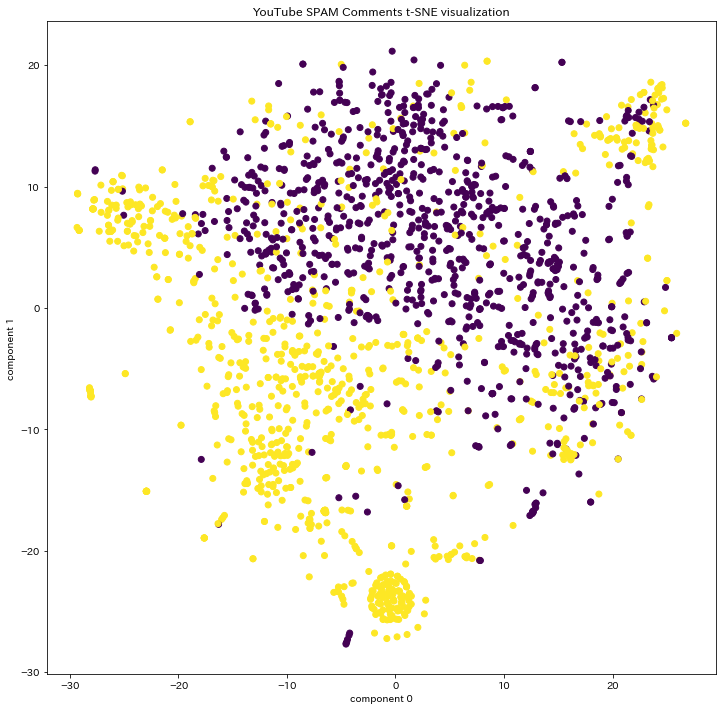

In [5]:
Y = tsne(text_vector)

plt.figure(figsize=(12,12))
    
plt.scatter(Y[:, 0], Y[:, 1], c=df["category_id"])
plt.xlabel("component 0")
plt.ylabel("component 1")
plt.title("YouTube SPAM Comments t-SNE visualization")

In [6]:
df = pd.read_csv("../input/training.1600000.processed.noemoticon.csv",
                              sep=',', header=None, error_bad_lines=False, encoding='latin1', quoting=csv.QUOTE_ALL)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df_list = df[5].values.tolist()

embed = hub.Module("https://tfhub.dev/google/nnlm-en-dim128/1")
m = embed(df_list)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [8]:
with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        text_vector = sess.run(m)
    
text_vector = np.array(text_vector, dtype = 'float64')
text_vector

array([[ 0.08509474, -0.01260087,  0.00195483, ...,  0.24693352,
         0.02396639, -0.0714004 ],
       [ 0.3088209 , -0.02079009, -0.03500963, ...,  0.01393811,
        -0.03520852,  0.1424005 ],
       [ 0.39936039, -0.01566775,  0.09070402, ..., -0.03925597,
         0.1687218 ,  0.09899048],
       ...,
       [ 0.25194016,  0.14697412,  0.0663728 , ...,  0.02749739,
         0.02050271,  0.05409633],
       [ 0.0857113 , -0.00570003, -0.0894658 , ...,  0.17871495,
         0.02477382, -0.19305585],
       [-0.2514742 ,  0.10991312, -0.1475711 , ...,  0.06161447,
         0.02231993, -0.09497096]])

In [ ]:
Y = tsne(text_vector)

plt.figure(figsize=(12,12))
    
plt.scatter(Y[:, 0], Y[:, 1], c=df[0])
plt.xlabel("component 0")
plt.ylabel("component 1")
plt.title("Sentiment140 t-SNE visualization 10000 samples")